In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import time
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.metrics import f1_score, log_loss

import xgboost as xgb
IDIR = '../../features/'

In [2]:
%%time

df_train = pd.read_csv('../../features/df_train_feats_38.csv')
order_id = df_train['order_id']
product_id = df_train['product_id']

# labels = pd.read_csv('../../features/labels_feats_38.csv')
labels = df_train['reordered']
df_train = df_train.drop(['order_id', 'product_id', 'user_id', \
                          'product_id_r', 'order_id_r', 'eval_set', \
                          'reordered', 'ord_prod_id', 'ord_prod_id_r'], axis=1)

CPU times: user 1min 11s, sys: 8.71 s, total: 1min 20s
Wall time: 1min 21s


In [3]:
%%time

print('formating for xgb')
d_train = xgb.DMatrix(df_train, label = labels)

formating for xgb
CPU times: user 9.71 s, sys: 15.6 s, total: 25.3 s
Wall time: 30.3 s


In [4]:
params = {
  "objective"           : "reg:logistic",
  "eval_metric"         : "logloss",
  "eta"                 : 0.2,
  "max_depth"           : 6,
  "min_child_weight"    : 10,
  "gamma"               : 0.70,
  "subsample"           : 0.76,
  "colsample_bytree"    : 0.95,
  "alpha"               : 2e-05,
  "lambda"              : 10
}

In [5]:
# n_folds = 2
ROUNDS = 500
estop = 15
training_examples = []
hist_train = []
hist_val = []
start_time = time.time()

for n_folds in range(2, 11, 1):
    print('XGB train...')
    skf = StratifiedKFold(n_splits = n_folds, random_state=None, shuffle=False)
    for train_index, val_index in skf.split(df_train, labels):
        X_train, X_val = df_train.iloc[train_index, :], df_train.iloc[val_index, :]
        y_train, y_val = labels[train_index], labels[val_index]

        print('formating for xgb')
        d_train = xgb.DMatrix(X_train, label = y_train)
        d_valid = xgb.DMatrix(X_val, label = y_val)
        watchlist = [(d_train, 'train'), (d_valid, 'val')]

        print('Training...')
        bst = xgb.train(params = params, \
                        dtrain = d_train, \
                        num_boost_round = ROUNDS, \
                        evals = watchlist, \
                        verbose_eval = 10, \
                        early_stopping_rounds = estop)

        pred_val = bst.predict(xgb.DMatrix(X_val))
        pred_train = bst.predict(xgb.DMatrix(X_train))

        loss_train = log_loss(y_train, pred_train)
        loss_val = log_loss(y_val, pred_val)
        break

    # Save XGB model.
    stamp = ''
    for i, item in enumerate(list(params.values())):
        if i <= 1:
            stamp = '_' + str(n_folds) + '_' + str(ROUNDS)
            continue
        else:
            stamp += '_' + str(item)
    print('xgb{}_feats38'.format(stamp))
    bst.save_model('xgb{}_feats38'.format(stamp))

    # Save the training history for learning curve
    training_examples.append(X_train.shape[0])
    hist_train.append(loss_train)
    hist_val.append(loss_val)
    print('Folds: ', n_folds, ' - Time Elapsed: ', time.time() - start_time)

XGB train...
formating for xgb
Training...
[0]	train-logloss:0.565265	val-logloss:0.565126
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 15 rounds.
[10]	train-logloss:0.264911	val-logloss:0.264348
[20]	train-logloss:0.247178	val-logloss:0.246647
[30]	train-logloss:0.245498	val-logloss:0.245173
[40]	train-logloss:0.244876	val-logloss:0.244806
[50]	train-logloss:0.244324	val-logloss:0.244494
[60]	train-logloss:0.243981	val-logloss:0.244412
[70]	train-logloss:0.243648	val-logloss:0.244306
[80]	train-logloss:0.243372	val-logloss:0.244233
[90]	train-logloss:0.243061	val-logloss:0.244163
[100]	train-logloss:0.242828	val-logloss:0.244127
[110]	train-logloss:0.242549	val-logloss:0.244094
Stopping. Best iteration:
[102]	train-logloss:0.242744	val-logloss:0.244093

xgb_2_500_0.2_6_10_0.7_0.76_0.95_2e-05_10_feats38
Folds:  2  - Time Elapsed:  539.3184728622437
XGB train...
formating for xgb
Training...
[0]	t

[180]	train-logloss:0.241833	val-logloss:0.243922
[190]	train-logloss:0.241706	val-logloss:0.243906
[200]	train-logloss:0.241562	val-logloss:0.243891
[210]	train-logloss:0.241409	val-logloss:0.243906
Stopping. Best iteration:
[199]	train-logloss:0.241576	val-logloss:0.243885

xgb_8_500_0.2_6_10_0.7_0.76_0.95_2e-05_10_feats38
Folds:  8  - Time Elapsed:  7686.735204935074
XGB train...
formating for xgb
Training...
[0]	train-logloss:0.565159	val-logloss:0.565119
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 15 rounds.
[10]	train-logloss:0.264478	val-logloss:0.264322
[20]	train-logloss:0.246904	val-logloss:0.246753
[30]	train-logloss:0.245211	val-logloss:0.245208
[40]	train-logloss:0.244659	val-logloss:0.244775
[50]	train-logloss:0.244303	val-logloss:0.244548
[60]	train-logloss:0.244037	val-logloss:0.244438
[70]	train-logloss:0.243772	val-logloss:0.244322
[80]	train-logloss:0.243566	val-logloss:0.2442

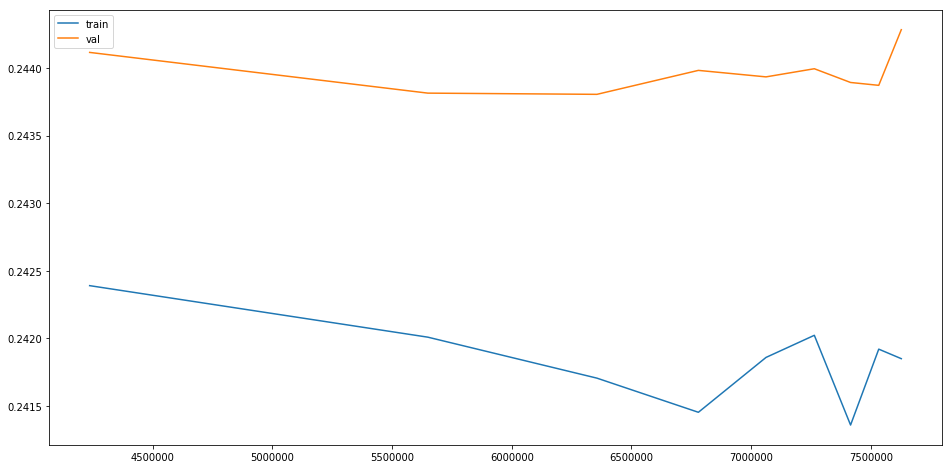

In [11]:
# training_examples, hist_train, hist_val
_ = plt.figure(figsize=(16, 8))
_ = plt.plot(training_examples, hist_train, label='train')
_ = plt.plot(training_examples, hist_val, label='val')
_ = plt.legend()

In [13]:
min(hist_val)
hist_val

[0.24411533299519261,
 0.24381403504062421,
 0.24380506433817417,
 0.24398232276874646,
 0.24393428974468248,
 0.24399451413002332,
 0.24389284943821124,
 0.24387168378526838,
 0.24428344897743964]

# Make Prediction

In [15]:
# Directly load joined data.

df_test = pd.read_csv(IDIR + 'df_test_feats_38.csv')
print(df_test.shape)

test_order_id = df_test['order_id']
test_product_id = df_test['product_id']

df_test = df_test.drop(['order_id', 'product_id', 'user_id', \
                          'product_id_r', 'order_id_r', 'eval_set', \
                          'reordered', 'ord_prod_id', 'ord_prod_id_r'], axis=1)

df_test.head()

(4833292, 47)


user_total_orders  user_total_items  total_distinct_items  \
0                 13                88                    33   
1                 13                88                    33   
2                 13                88                    33   
3                 13                88                    33   
4                 13                88                    33   

   user_average_days_between_orders  user_average_basket  order_hour_of_day  \
0                              12.0             6.769231                 15   
1                              12.0             6.769231                 15   
2                              12.0             6.769231                 15   
3                              12.0             6.769231                 15   
4                              12.0             6.769231                 15   

   days_since_prior_order  days_since_ratio  aisle_id  department_id  \
0                    11.0          0.916667        91             16   
1                    11.0          0.916667        91             16   
2                    11.0          0.916667        83              4   
3                    11.0          0.916667       123              4   
4                    11.0          0.916667        83              4   

                ...                 user_period  user_mean_days_since_prior  \
0               ...                         133                   12.090909   
1               ...                         133                   12.090909   
2               ...                         133                   12.090909   
3               ...                         133                   12.090909   
4               ...                         133                   12.090909   

   user_total_products  user_reorder_ratio  user_distinct_products  \
0                   88            0.705128                      33   
1                   88            0.705128                      33   
2                   88            0.705128                      33   
3                   88            0.705128                      33   
4                   88            0.705128                      33   

   user_average_basket_r  time_since_last_order  up_order_rate  \
0               7.333333                     11       0.416667   
1               7.333333                     11       0.833333   
2               7.333333                     11       0.166667   
3               7.333333                     11       0.666667   
4               7.333333                     11       0.166667   

   up_orders_since_last_order  up_order_rate_since_first_order  
0                           1                         0.416667  
1                           0                         0.833333  
2                           6                         0.250000  
3                           0                         0.666667  
4                           5                         0.285714  

[5 rows x 38 columns]

In [62]:
# Load Model
bst = xgb.Booster()
bst.load_model('xgb_4_500_0.2_6_10_0.7_0.76_0.95_2e-05_10_feats38')

In [66]:
pred = pd.DataFrame(bst.predict(xgb.DMatrix(df_test)))
print(pred.shape)
print(pred.head())

# df_test['order_id'] = test_order_id
# df_test['product_id'] = test_product_id
# del test_order_id, test_product_id
# df_test.head()

(4833292, 1)
          0
0  0.324983
1  0.735323
2  0.074142
3  0.628608
4  0.088378


In [64]:
%%time

df_test['pred'] = pred
TRESHOLD = 0.20

d = dict()
for row in df_test.itertuples():
    if row.pred > TRESHOLD:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

# Get test_orders with order_id
orders = pd.read_csv('../../data/orders.csv')
test_orders = orders[orders.eval_set == 'test']
del orders

for order in test_orders.order_id:
    if order not in d:
        d[order] = 'None'

del test_orders

CPU times: user 25.6 s, sys: 422 ms, total: 26.1 s
Wall time: 26.1 s


In [65]:
sub = pd.DataFrame.from_dict(d, orient='index')
print(sub.shape)
sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']
sub.to_csv('sub.csv', index=False)
sub.head(10)

(75000, 1)


order_id                                           products
0   2774568          17668 39190 21903 47766 18599 43961 23650
1   1528013                                        38293 21903
2   1376945  33572 17706 28465 27959 30563 44632 24799 3465...
3   1356845                 11520 14992 7076 13176 28134 10863
4   2161313      11266 196 10441 12427 37710 48142 14715 27839
5   1416320  15872 5134 21903 24852 21137 48283 17948 21405...
6   1735923  17008 2192 196 15599 31487 15131 35123 12108 3...
7   1980631            13575 6184 9387 46061 41400 22362 13914
8   1411408                                        26452 22008
9   2940603          30592 19894 10339 44632 18531 14947 31615

# F1 Score Cross Validation

In [51]:
df_train['order_id'] = order_id
df_train['product_id'] = product_id
df_val = df_train.iloc[val_index, :]
df_val.shape

(847467, 41)

In [117]:
# Cross_Val to tune the threshold here.
df_val['pred'] = pred_val
TRESHOLD = 0.15
d = dict()
order_id_list = []
product_id_list = []
for row in df_val.itertuples():
    if row.pred > TRESHOLD:
        order_id_list.append(row.order_id)
        product_id_list.append(row.product_id)
        d[row.order_id] = 1
        

for order in df_val.order_id:
    if order not in d:
        order_id_list.append(order)
        product_id_list.append('None')

y_pred = pd.DataFrame(data={'order_id': order_id_list, 'product_id': product_id_list})
y_pred = y_pred.groupby('order_id')['product_id'].apply(list)
print(y_pred.shape)
y_pred.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(171809, 2)


order_id product_id
0   1187899        196
1   1187899      13032
2   1187899      39657
3   1187899      12427
4   1187899      25133

In [106]:
y_true = df_val.groupby('order_id')['product_id'].apply(list)
print(y_true.shape)
y_true.head()

(13219,)


order_id
96      [19904, 40706, 34949, 32139, 34050, 4461, 2067...
988     [9387, 38918, 46088, 19468, 13841, 38318, 3894...
1042    [24964, 26629, 11782, 34956, 21137, 30482, 248...
1275    [13409, 37570, 8518, 39558, 11046, 47209, 1236...
1865    [41696, 38849, 23234, 14715, 44292, 49605, 318...
Name: product_id, dtype: object

In [119]:
def multilabel_fscore(y_true, y_pred):
    """
    ex1:
    y_true = [1, 2, 3]
    y_pred = [2, 3]
    return: 0.8
    
    ex2:
    y_true = ["None"]
    y_pred = [2, "None"]
    return: 0.666
    
    ex3:
    y_true = [4, 5, 6, 7]
    y_pred = [2, 4, 8, 9]
    return: 0.25
    
    """
    y_true, y_pred = set(y_true), set(y_pred)
    
    precision = sum([1 for i in y_pred if i in y_true]) / len(y_pred)
    
    recall = sum([1 for i in y_true if i in y_pred]) / len(y_true)
    
    if precision + recall == 0:
        return 0
    return (2 * precision * recall) / (precision + recall)

# Get train order set for (order_id, [product_id])
score = list(map(multilabel_fscore, y_true, y_pred))
print(np.sum(score) / len(y_true))
# np.sum(y_pred.index == y_true.index)

0.388553893725
